# WeatherPy

In [73]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [74]:
#for x in range(180):
#    modu = x % 60
#    print(f"x= {x}, modu = {modu}")
#    if modu == 0: time.sleep(10)

#sleep_list = np.arange(59,648,59)
#print(sleep_list)
#if 531 in sleep_list: print("goo in")


## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_cities = len(cities)
if num_cities < 500:
    print(f"Only {num_cities} were generated. The program will end and you may try again.")
    exit()

print(f"We will attempt to collect OpenWeather data for {num_cities} cities.")

We will attempt to collect OpenWeather data for 615 cities.


In [76]:
# Build initial dataframe and query arguments
city_weather = pd.DataFrame(cities, columns=["City"])
city_weather["Max Temperature"] = ""
city_weather["Humidity"] = ""
city_weather["Cloudiness"] = ""
city_weather["Wind Speed"] = ""
city_weather["Latitude"] = ""
city_weather["Country"] = ""

# Variables to build url and specify imperial units rather than default metric
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#test_url = f"{url}appid={api_key}&units={units}&q="

# Key word arguments to pass in units setting and API key
settings = { "units": units, "appid": api_key}

# list to pass in desired weather metrics
weather_stats = ["id","main.temp_max","main.humidity","clouds.all","wind.speed","coord.lat","sys.country"]

openweather_hits = 0

#print(f"Settings = {settings}")
#print(f"weather = {weather_stats}")

In [77]:
# Set up list of records at which to sleep (because of OpenWeather hit limits)
sleep_list = np.arange(60,num_cities,60)

# Make API calls
for index, row in city_weather.iterrows():
    if index < 1000:
        if index in sleep_list:
            print("Sleeping for 61 seconds...")
            time.sleep(61)
        city = row["City"]

        try:
            response = owm.get_current(city,**settings)
            city_data = response(*weather_stats)
            #print(f'city_data is: {city_data}')   
            print(f"Processing Record '{index}' for city: '{city}'. City number:'{city_data[0]}'") 

            city_weather.loc[index,"Max Temperature"] = (city_data[1])
            city_weather.loc[index,"Humidity"] = city_data[2]
            city_weather.loc[index,"Cloudiness"] = city_data[3]
            city_weather.loc[index,"Wind Speed"] = (city_data[4])
            city_weather.loc[index,"Latitude"] = (city_data[5])
            city_weather.loc[index,"Country"] = (city_data[6])
            
        except Exception:
            print(f"The city {city} was not found on OpenWeather.")

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

Processing Record '0' for city: 'punta arenas'. City number:'3874787'
Processing Record '1' for city: 'chuy'. City number:'3443061'
The city buon me thuot was not found on OpenWeather.
Processing Record '3' for city: 'cape town'. City number:'3369157'
Processing Record '4' for city: 'kaeo'. City number:'2189343'
Processing Record '5' for city: 'yellowknife'. City number:'6185377'
Processing Record '6' for city: 'paralimni'. City number:'734330'
The city halalo was not found on OpenWeather.
Processing Record '8' for city: 'ushuaia'. City number:'3833367'
Processing Record '9' for city: 'severo-kurilsk'. City number:'2121385'
Processing Record '10' for city: 'waingapu'. City number:'1622318'
Processing Record '11' for city: 'georgetown'. City number:'3378644'
Processing Record '12' for city: 'arraial do cabo'. City number:'3471451'
Processing Record '13' for city: 'mareeba'. City number:'2158767'
Processing Record '14' for city: 'tuktoyaktuk'. City number:'6170031'
Processing Record '15'

Processing Record '124' for city: 'miramar'. City number:'3622854'
Processing Record '125' for city: 'castro'. City number:'3896218'
Processing Record '126' for city: 'kudahuvadhoo'. City number:'1337607'
The city satitoa was not found on OpenWeather.
Processing Record '128' for city: 'leh'. City number:'1264976'
Processing Record '129' for city: 'pucallpa'. City number:'3693345'
Processing Record '130' for city: 'ilulissat'. City number:'3423146'
Processing Record '131' for city: 'hilo'. City number:'5855927'
Processing Record '132' for city: 'east london'. City number:'1006984'
Processing Record '133' for city: 'ribeira grande'. City number:'3372707'
Processing Record '134' for city: 'varberg'. City number:'2664996'
Processing Record '135' for city: 'jacareacanga'. City number:'3397763'
Processing Record '136' for city: 'ixtapa'. City number:'4004293'
Processing Record '137' for city: 'mar del plata'. City number:'3863379'
Processing Record '138' for city: 'neiafu'. City number:'4032

Processing Record '246' for city: 'campina verde'. City number:'3467860'
Processing Record '247' for city: 'forestville'. City number:'6944112'
Processing Record '248' for city: 'birjand'. City number:'140463'
The city tuggurt was not found on OpenWeather.
Processing Record '250' for city: 'batagay-alyta'. City number:'2027042'
Processing Record '251' for city: 'suhbaatar'. City number:'2029156'
Processing Record '252' for city: 'port alfred'. City number:'964432'
Processing Record '253' for city: 'hofn'. City number:'2630299'
Processing Record '254' for city: 'san juan de la maguana'. City number:'3493081'
Processing Record '255' for city: 'trois-rivieres'. City number:'6169141'
Processing Record '256' for city: 'suarez'. City number:'3667772'
Processing Record '257' for city: 'mandalgovi'. City number:'2030065'
Processing Record '258' for city: 'torbay'. City number:'6167817'
Processing Record '259' for city: 'san rafael'. City number:'3836669'
The city urumqi was not found on OpenWe

Processing Record '370' for city: 'kasongo'. City number:'213940'
Processing Record '371' for city: 'banda aceh'. City number:'1215502'
Processing Record '372' for city: 'nyimba'. City number:'900056'
Processing Record '373' for city: 'mount isa'. City number:'2065594'
Processing Record '374' for city: 'aasiaat'. City number:'3424901'
Processing Record '375' for city: 'kibala'. City number:'2425791'
The city barentsburg was not found on OpenWeather.
Processing Record '377' for city: 'capreol'. City number:'5959803'
Processing Record '378' for city: 'ovsyanka'. City number:'2018214'
Processing Record '379' for city: 'kumluca'. City number:'305681'
Processing Record '380' for city: 'rupert'. City number:'5606000'
Processing Record '381' for city: 'ranghulu'. City number:'2035225'
Processing Record '382' for city: 'leshukonskoye'. City number:'535839'
Processing Record '383' for city: 'osoyoos'. City number:'6094665'
Processing Record '384' for city: 'killybegs'. City number:'2963295'
Pro

Processing Record '490' for city: 'takapau'. City number:'2181988'
The city maarianhamina was not found on OpenWeather.
Processing Record '492' for city: 'mitu'. City number:'117392'
Processing Record '493' for city: 'okhotsk'. City number:'2122605'
Processing Record '494' for city: 'chaumont-gistoux'. City number:'2800430'
The city aflu was not found on OpenWeather.
Processing Record '496' for city: 'trapani'. City number:'6542155'
Processing Record '497' for city: 'dukat'. City number:'3184575'
Processing Record '498' for city: 'axim'. City number:'2303611'
Processing Record '499' for city: 'comodoro rivadavia'. City number:'3860443'
Processing Record '500' for city: 'alofi'. City number:'4036284'
The city umzimvubu was not found on OpenWeather.
Processing Record '502' for city: 'provideniya'. City number:'4031574'
Processing Record '503' for city: 'murovani kurylivtsi'. City number:'700606'
Processing Record '504' for city: 'upata'. City number:'3625710'
Processing Record '505' for 

Processing Record '614' for city: 'husavik'. City number:'5961417'
-----------------------------------------
Data Retrieval Complete
-----------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
# Create new df without rows where city was not found
weather_data_df = city_weather[city_weather["Country"] != ""]

# Give message if deleted cities resulted in sample of less than 500
weather_data_length = len(weather_data_df)
if weather_data_length < 500:
    print(f'OpenWeather only had information for {weather_data_length} cities. You '\
    'may wish to run the program again to meet the minimum desired sample of 500 cities.')

# Write data to file
weather_data_df.to_csv(output_data_file)

weather_data_df.head()

,City,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Country
0,punta arenas,35.6,80,40,10.29,-53.16,CL
1,chuy,42.18,81,0,12.19,-33.69,UY
3,cape town,59,93,75,12.75,-33.93,ZA
4,kaeo,62.01,85,48,11.01,-35.1,NZ
5,yellowknife,53.6,76,75,24.16,62.45,CA


#### Latitude vs. Temperature Plot

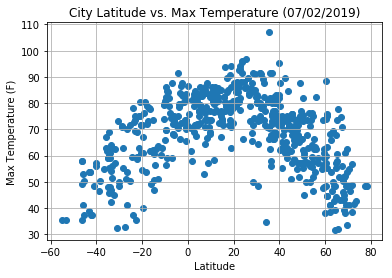

In [79]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], marker="o")

plt.title("City Latitude vs. Max Temperature (07/02/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_by_maxtemp.png")

plt.show()

#### Latitude vs. Humidity Plot

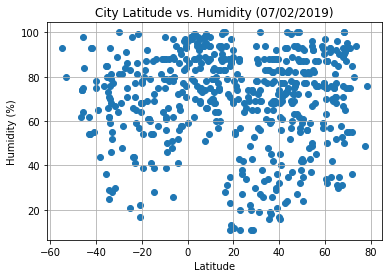

In [80]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (07/02/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_by_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

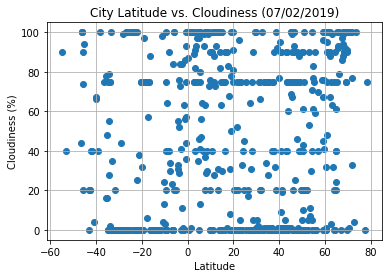

In [81]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/02/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latitude_by_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

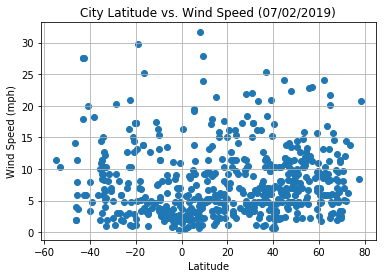

In [82]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/02/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latitude_by_windspeed.png")

# Show plot
plt.show()
